<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes
GraceData = GraceData[GraceData['Diabetes'] != '-1']

DiabeticSamples = GraceData[GraceData["Diabetes"] == '2']

GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Converts 'Country' column to numerical

X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]


# OVERSAMPLING

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)



print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(8418, 51)
(8418,)


# Models

In [14]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest: "))

if ModelSelection == 1:
  parameters = {"n_neighbors":range(1,50)}
  modelType = KNeighborsClassifier(weights="distance")

elif ModelSelection == 2:
  parameters = {"max_depth":range(1,30),'max_features': range(1,10)} # Parameters for decision tree
  modelType = DecisionTreeClassifier()

elif ModelSelection == 3:
  parameters = {"n_estimators": range(1,31,10),"max_depth": range(1,51,10)} # Parameters for random forest (estimators 181)
  #modelType = RandomForestClassifier(verbose=1,n_estimators = 30, max_depth = 50)#,class_weight="balanced")
  modelType = RandomForestClassifier(random_state=40,verbose=1)
else:
  print("Invalid input")

GSD = GridSearchCV(modelType,parameters, scoring='f1_micro')

GSD.fit(X_train_scaled,y_train) # Fit on scaled data

print(GSD.best_estimator_.score(X_test_scaled,y_test)) # Score on scaled data
print(GSD.best_params_)


1 nearest neighbour, 2 decision tree, 3 random forest: 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

0.9934679334916865
{'max_depth': 31, 'n_estimators': 21}


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


# Confusion Matrix

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


RandomForestClassifier(random_state=40, verbose=1)


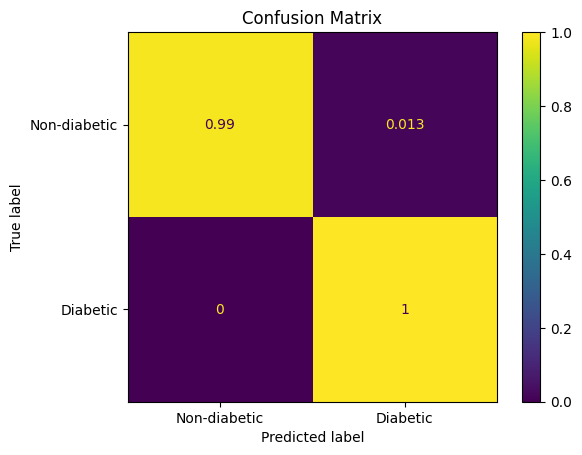


0.9934679334916865

Diet feature importance

FreeSugarsg                   0.029195
FreeSugarspcfoodE             0.026502
FreeSugarspctotE              0.021939
totalveg                      0.017462
totalmeat                     0.016872
TotalsugarspctotE             0.016750
Totalsugarsg                  0.015817
SFApctotE                     0.014699
Fatg                          0.014537
totalfruit                    0.014415
FRUIT                         0.014379
PASTARICEANDOTHERCEREALS      0.014326
Carbohydrateg                 0.013708
CHOpctotE                     0.013578
WHITEBREAD                    0.013357
CHOpcfoodE                    0.013316
SFApcfoodE                    0.013258
Saturatedfattyacidsg          0.012988
SALADANDOTHERRAWVEGETABLES    0.012858
Fruitvegportions              0.012788
TotalsugarspcfoodE            0.012553
FoodEkcal                     0.011767
FatpcfoodE                    0.011682
FatpctotE                     0.011245
Starchg           

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PredictedResults = GSD.predict(X_test_scaled) # Predict on scaled data
ActualResults = y_test

CMlabels = ['1','2'] # Labels to match the values in y_test
DisplayLabels = ["Non-diabetic","Diabetic"] # Labels to display on the plot

cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test_scaled, y_test, normalize="true", labels=CMlabels, display_labels=DisplayLabels) # Display using scaled data and updated display_labels



#plt.title("Confusion Matrix")
print(modelType)
plt.title("Confusion Matrix")#\n")
plt.show()

print("")
print(GSD.best_estimator_.score(X_test_scaled,y_test))

if ModelSelection != 1:

  myClassifiers = pd.Series(GSD.best_estimator_.feature_importances_, index=X_train.columns)

  DietImportance = myClassifiers[["Energykcal", "FoodEkcal", "Proteing", "Fatg", "Saturatedfattyacidsg", "Carbohydrateg", "Totalsugarsg", "Starchg", "FreeSugarsg", "AOACFibreg", "FatpctotE", "FatpcfoodE", "CHOpcfoodE", "CHOpctotE", "SFApcfoodE", "SFApctotE", "TotalsugarspcfoodE", "TotalsugarspctotE", "FreeSugarspcfoodE", "FreeSugarspctotE", "WHOLEMEALBREAD", "SOFTDRINKSLOWCALORIE", "SOFTDRINKSNOTLOWCALORIE", "SUGARCONFECTIONERY", "FRUIT", "NUTSANDSEEDS", "PASTARICEANDOTHERCEREALS", "SALADANDOTHERRAWVEGETABLES", "WHITEBREAD", "Beansg", "totalfruit", "totalveg", "totalfruitandveg", "Fruitvegportions", "Totfruitvegportions", "Achieve5", "ProcessedRedMeatg", "totalredmeat", "totalmeat"]]
  DietImportance = DietImportance.sort_values(ascending=False)
  print("")
  print("Diet feature importance")
  print("")
  print(DietImportance)
  print("")
  print("Diet feature importance sum")
  print(DietImportance.sum())

print("All Feature Importance")
print("")
myClassifiers = myClassifiers.sort_values(ascending=False)
print(myClassifiers.head(15))

# Plotting Feature Importance

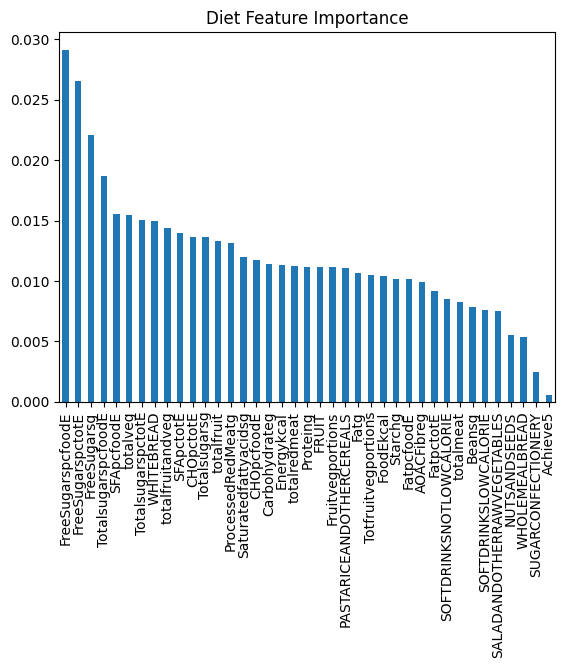

In [ ]:
import matplotlib.pyplot as plt

DietImportance.plot(kind="bar")
plt.title("Diet Feature Importance")
plt.show()

# Plotting Performance

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       854
           2       0.99      1.00      0.99       830

    accuracy                           0.99      1684
   macro avg       0.99      0.99      0.99      1684
weighted avg       0.99      0.99      0.99      1684



[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


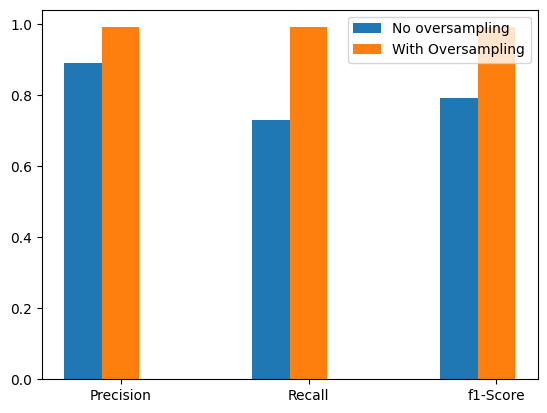

In [27]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print(classification_report(y_test,GSD.predict(X_test_scaled)))

#ModelPerformanceResults = {'Nearest Neightbour': [0.97,0.54,0.56],'Decision Tree':[0.73,0.61,0.64],'Random Forest':[0.89,0.73,0.79]}

ModelPerformanceResults = {'No oversampling': [0.89,0.73,0.79],'With Oversampling':[0.99,0.99,0.99]}
testDF = pd.DataFrame(data=ModelPerformanceResults)


width = 0.2
x = np.arange(3)

plt.bar(x-width, ModelPerformanceResults['No oversampling'], width)
plt.bar(x, ModelPerformanceResults['With Oversampling'], width)
#plt.bar(x+width, ModelPerformanceResults['Random Forest'], width)


plt.xticks(x, ['Precision','Recall','f1-Score'])
plt.legend(['No oversampling','With Oversampling'])

plt.show()
